In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import plotly.express as px
import plotly.graph_objs as go
sns.set_style('whitegrid')
pl.style.use('fivethirtyeight')

In [5]:
df=pd.read_csv('heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

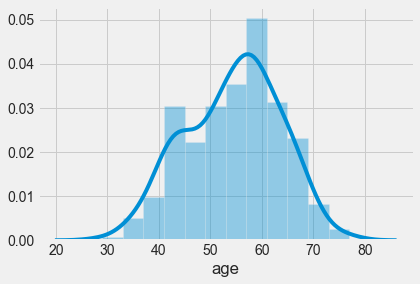

In [6]:
sns.distplot(df['age'])

In [7]:
fig=go.Figure(go.Scatter(x=df['age'],
                        y=df['chol'],
                        mode='markers'))
fig.update_layout(title='Age vs Cholestrol',
                 title_x=.5)

fig.show()

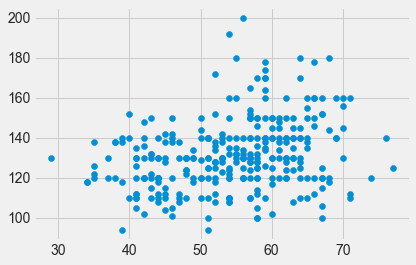

In [8]:
pl.scatter(df['age'],df['trestbps'])

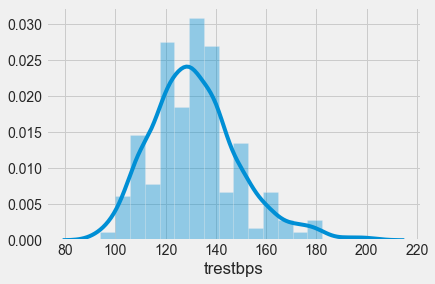

In [9]:
sns.distplot(df['trestbps'])

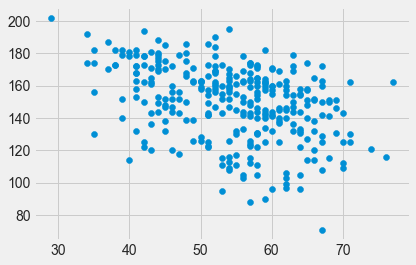

In [10]:
pl.scatter(df['age'],df['thalach'])

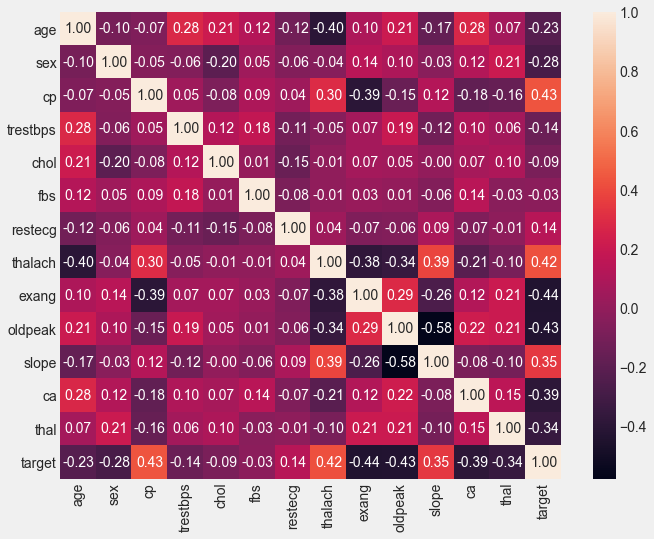

In [11]:
pl.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,
           fmt=".2f")

C:\Users\rissu\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\rissu\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\rissu\anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\rissu\anaconda3\lib\site-packages\matplotlib\contour.py:1483: UserWarning:


C:\Users\rissu\anaconda3\lib\site-packages\matplotlib\contour.py:1484: UserWarning:


C:\Users\rissu\anaconda3\lib\site-packages\seaborn\distributions.py:434: UserWarning:

No contour levels were found within the data range.

C:\Users\rissu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



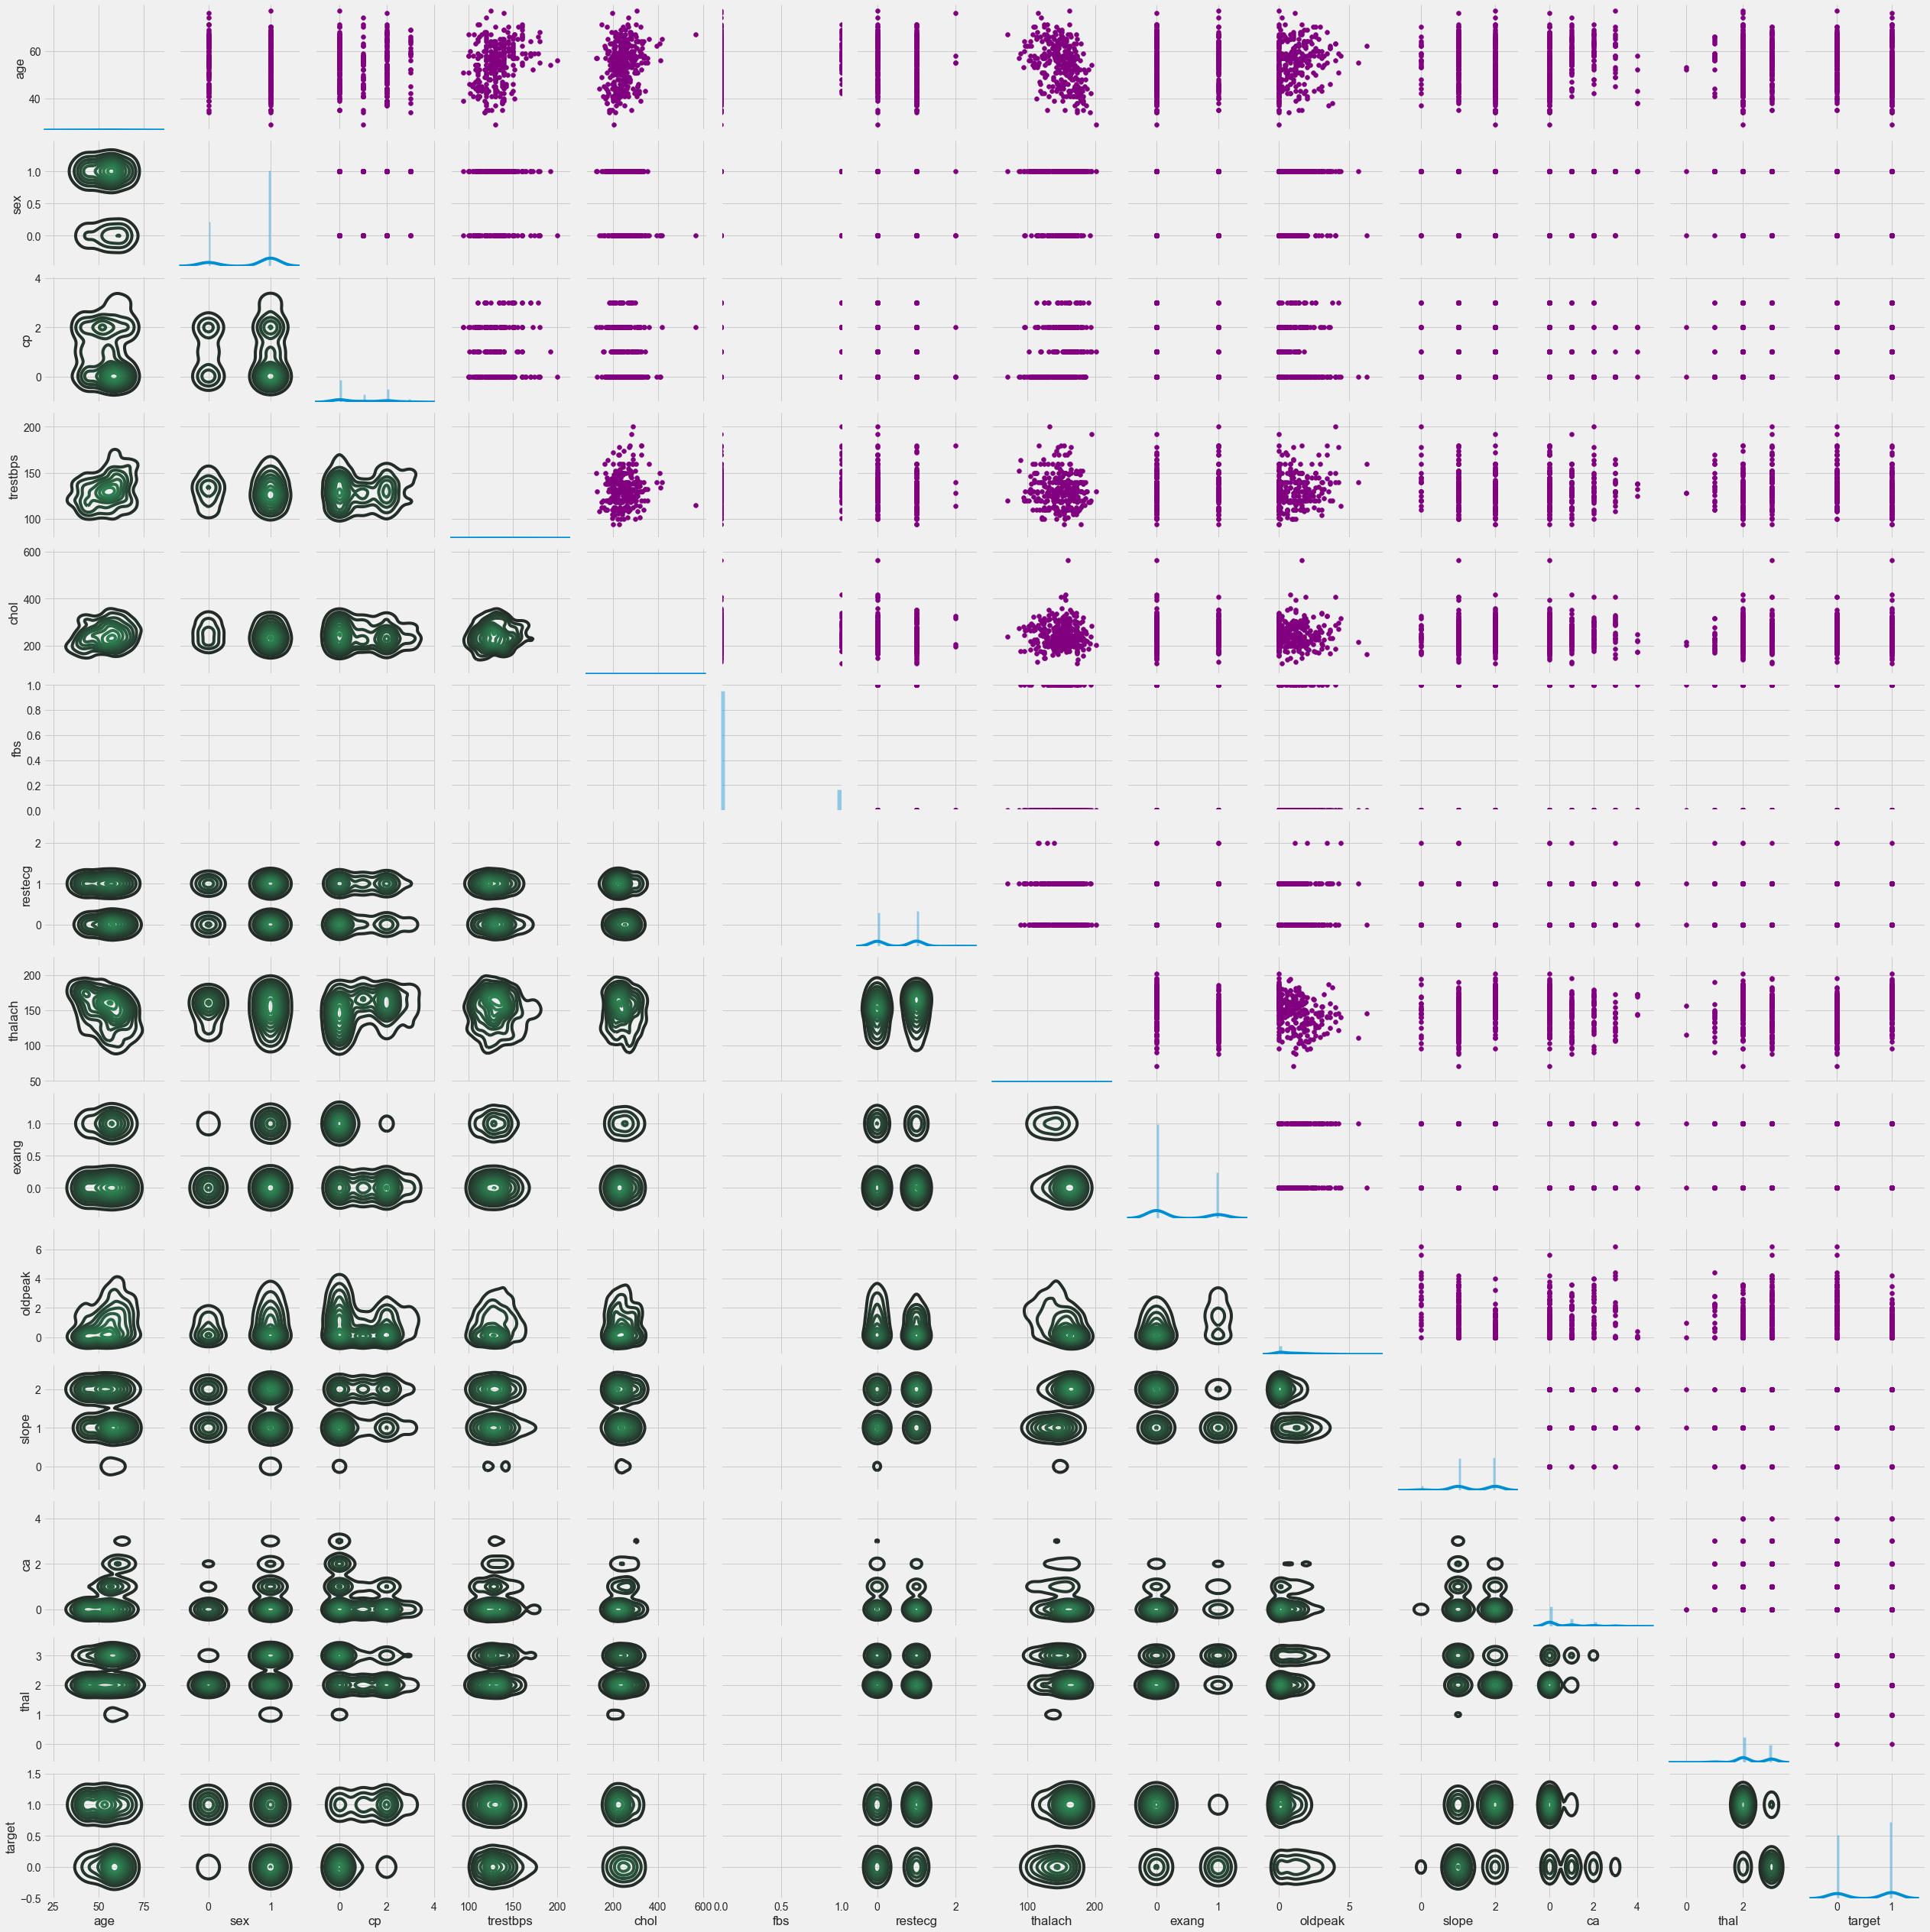

In [12]:
return_fig=sns.PairGrid(df)
return_fig.map_upper(pl.scatter,color='purple')
return_fig.map_lower(sns.kdeplot,color='seagreen')
return_fig.map_diag(sns.distplot,bins=30)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


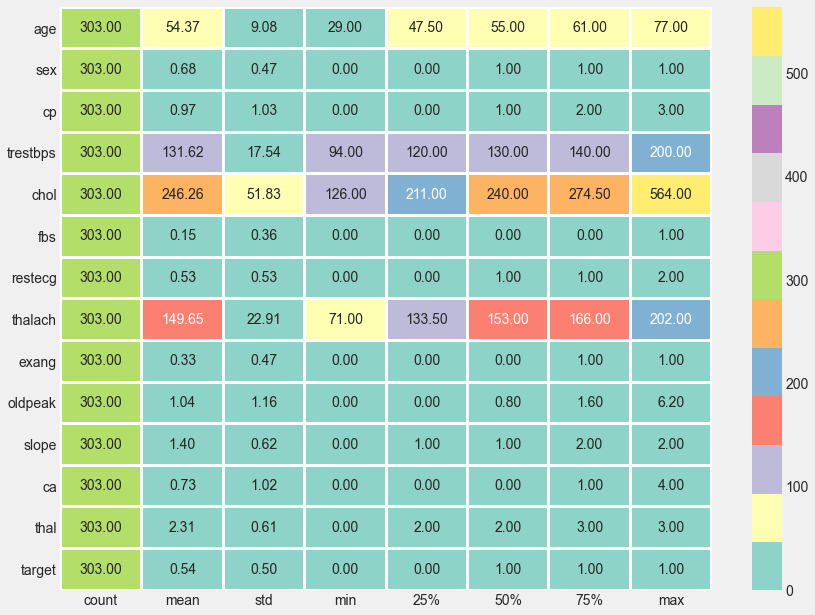

In [14]:
pl.figure(figsize=(13,10))
sns.heatmap(df.describe().T,annot=True,fmt='.2f',linewidth=2,cmap='Set3')
pl.show()

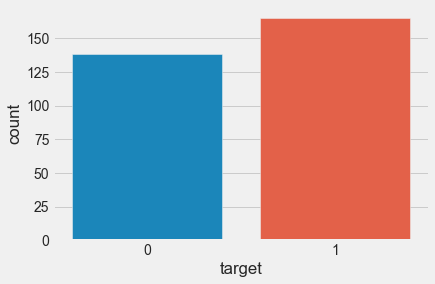

In [15]:
sns.countplot(df['target'])

In [16]:
fig=px.pie(df,names='target',hole=.5)

fig.show()

In [17]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
categorical_vals=[]
continous_vals=[]

for i in df.columns:
    if len(np.unique(df[i]))<=6:
        categorical_vals.append(i)
    else:
        continous_vals.append(i)

In [19]:
categorical_vals,continous_vals

(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'],
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

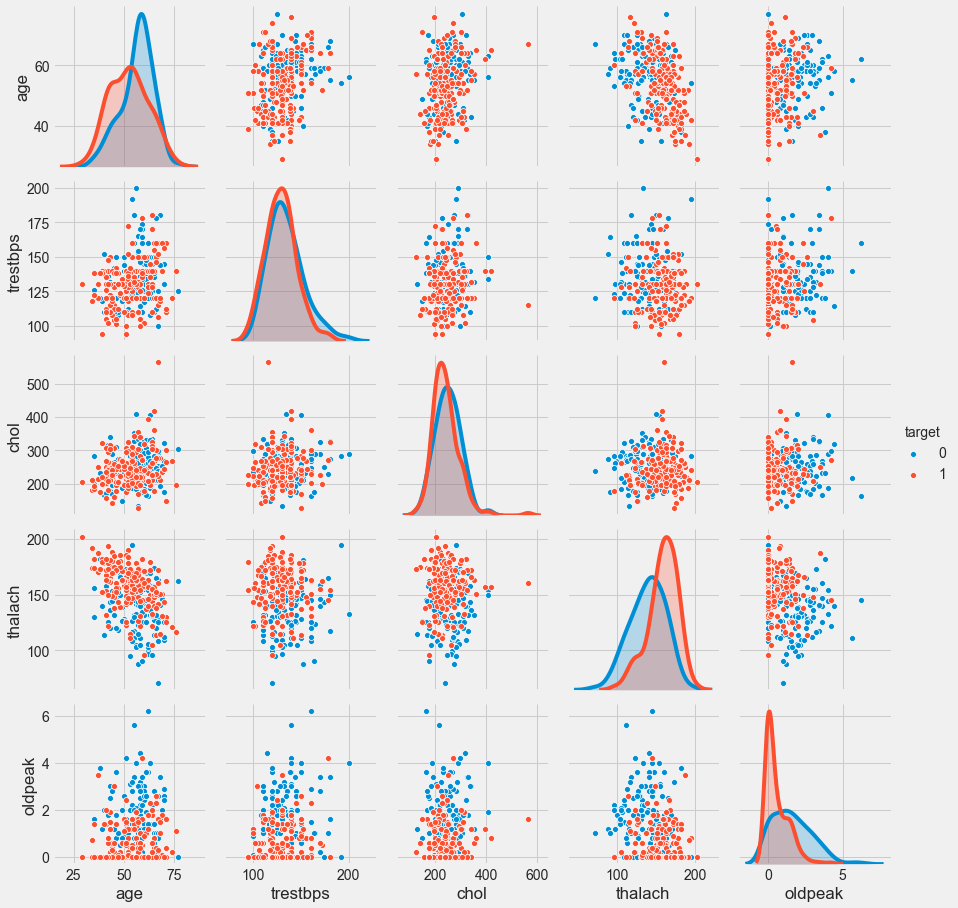

In [20]:
sns.pairplot(df,vars=continous_vals,hue='target')

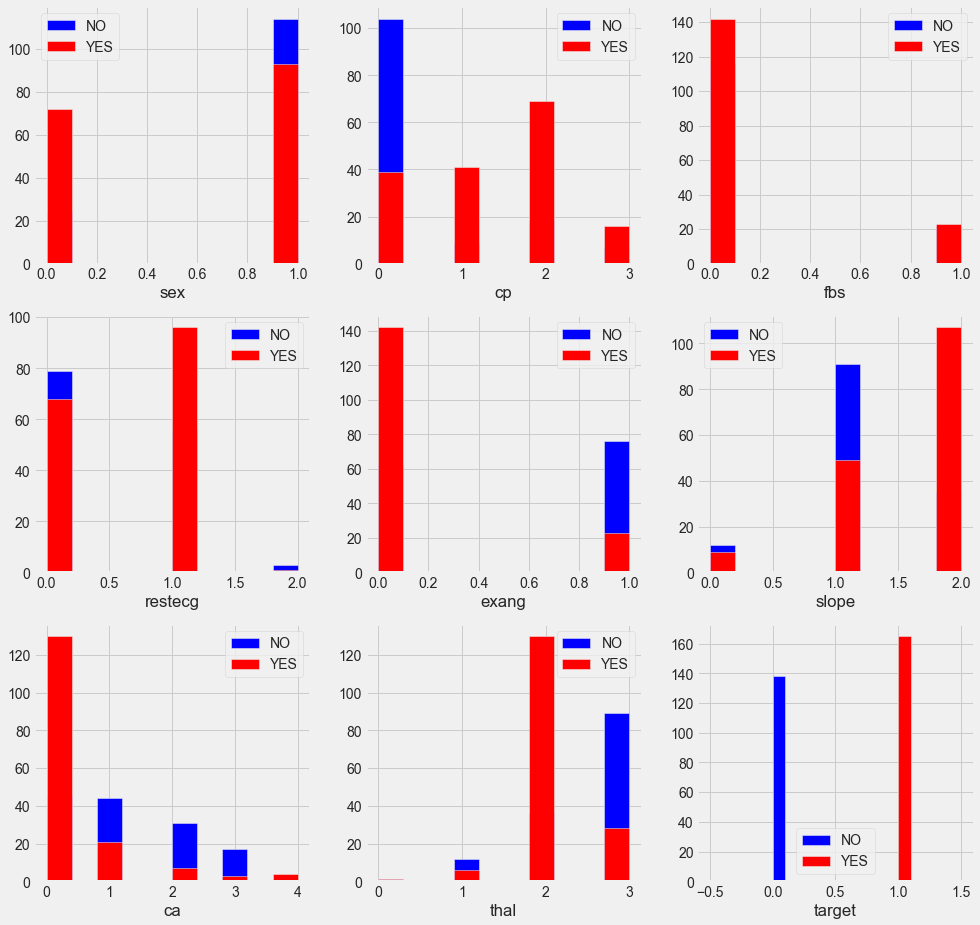

In [21]:
pl.figure(figsize=(15,15))
for i, column in enumerate(categorical_vals,1):
    pl.subplot(3,3,i)
    df[df['target']==0][column].hist(color='blue',label='NO')
    df[df['target']==1][column].hist(color='red',label='YES')
    pl.legend()
    pl.xlabel(column)

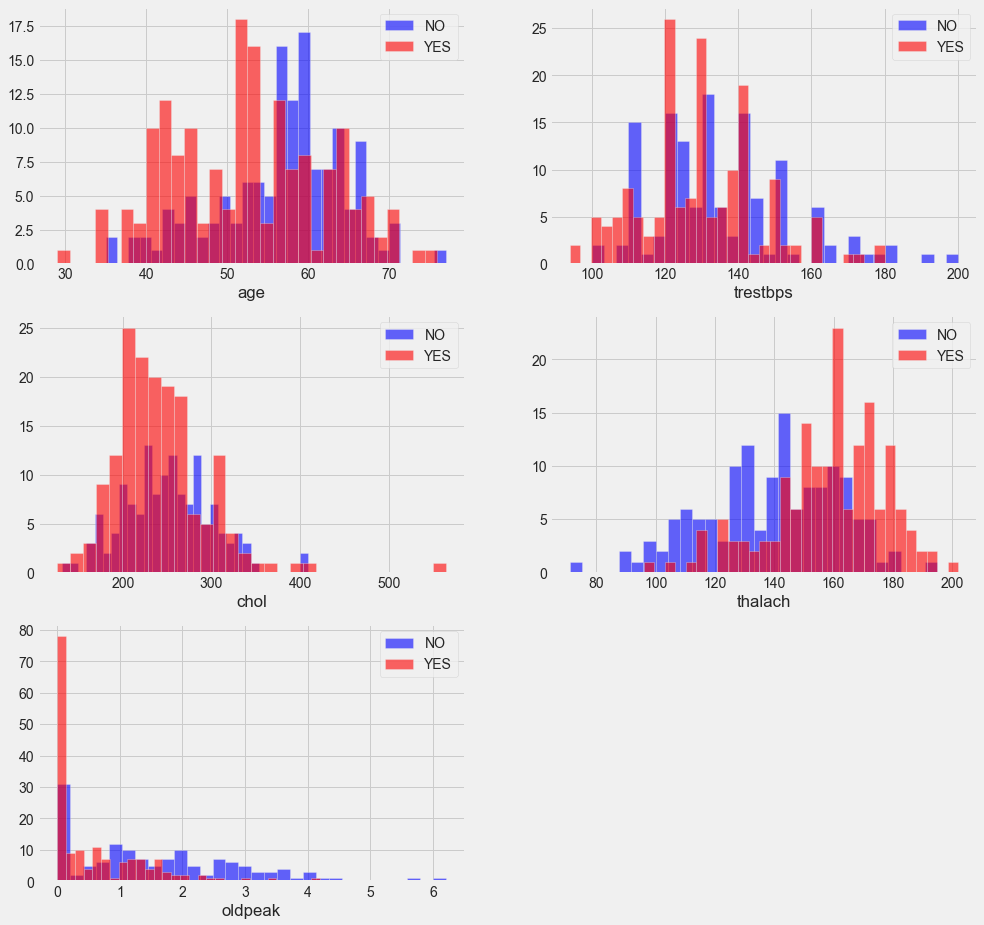

In [22]:
pl.figure(figsize=(15,15))
for i, column in enumerate(continous_vals,1):
    pl.subplot(3,2,i)
    df[df['target']==0][column].hist(bins=30,color='blue',label='NO',alpha=.6)
    df[df['target']==1][column].hist(bins=30,color='red',label='YES',alpha=.6)
    pl.legend()
    pl.xlabel(column)

In [23]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df.age[df.target==1],
                        y=df.thalach[df.target==1],
                        mode='markers',name='disease',
                         line=dict(color='royalblue',
                                  )
                        ))
fig.add_trace(go.Scatter(x=df.age[df.target==0],
                        y=df.thalach[df.target==0],
                        mode='markers',name='No Disease',
                         line=dict(color='red',
                                  )
                        ))
fig.update_layout(title='Age vs Thalach Scatter plot',title_x=.5,
                 xaxis_title='Age',yaxis_title='Thalach'
                 )

fig.show()

In [24]:
fig=px.scatter(df,x='age',y='thalach',color='target')
fig.update_layout(title='Age vs Thalach Scatter plot',title_x=.5)
fig.show()

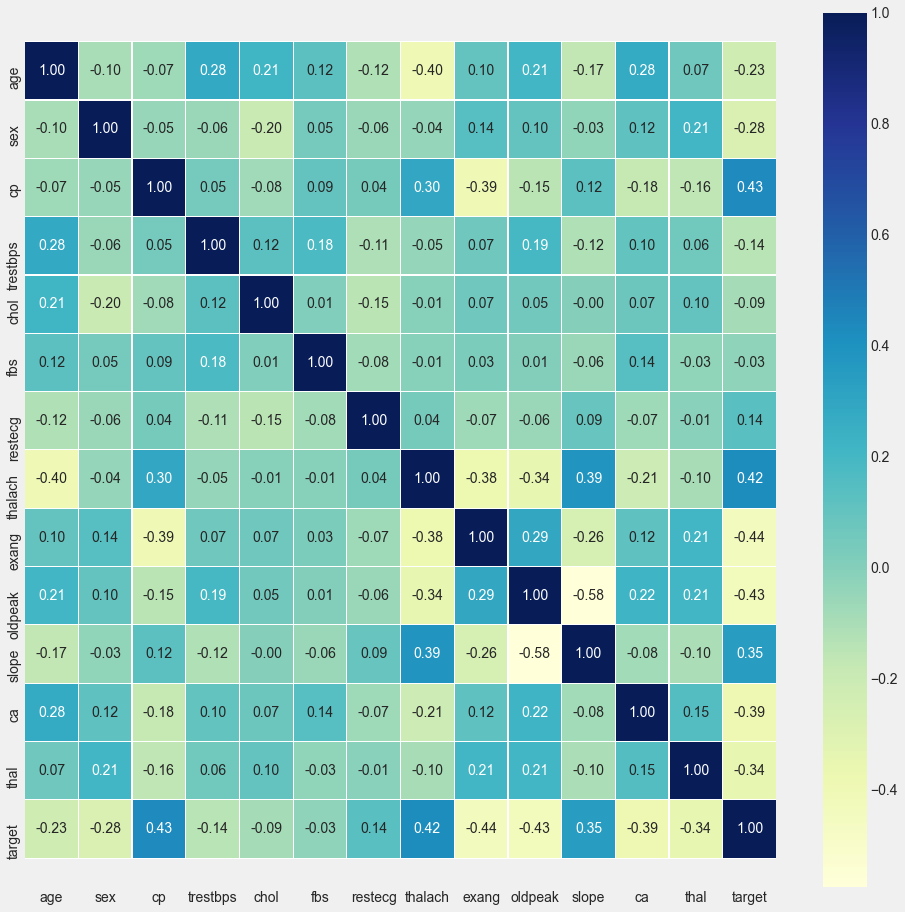

In [25]:
corr_matrix=df.corr()
fig,ax=pl.subplots(figsize=(15,15))
ax=sns.heatmap(corr_matrix,annot=True,fmt='.2f',linewidth=.2,cmap='YlGnBu')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+.5,top-.5)
pl.show()


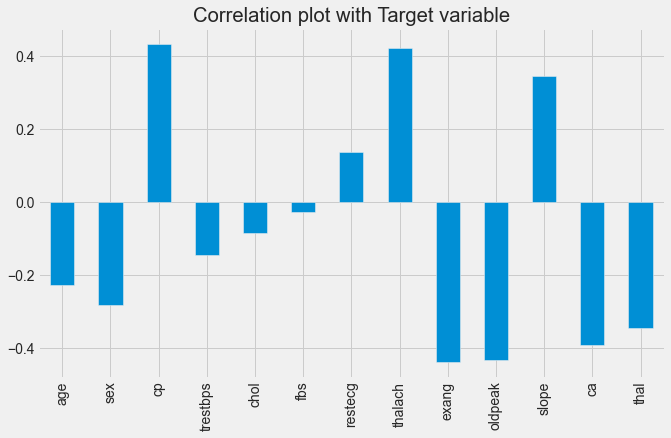

In [26]:
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',grid=True,figsize=(10,6),
                                                 title='Correlation plot with Target variable'
                                                 
                                                 )

In [27]:
categorical_vals.remove('target')

In [28]:
categorical_vals

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [29]:
dataset=pd.get_dummies(df,columns=categorical_vals,drop_first=True)

In [30]:
dataset.head()

age  trestbps  chol  thalach  oldpeak  target  sex_1  cp_1  cp_2  cp_3  \
0   63       145   233      150      2.3       1      1     0     0     1   
1   37       130   250      187      3.5       1      1     0     1     0   
2   41       130   204      172      1.4       1      0     1     0     0   
3   56       120   236      178      0.8       1      1     1     0     0   
4   57       120   354      163      0.6       1      0     0     0     0   

   ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  \
0  ...        0        0        0     0     0     0     0       1       0   
1  ...        0        0        0     0     0     0     0       0       1   
2  ...        0        0        1     0     0     0     0       0       1   
3  ...        0        0        1     0     0     0     0       0       1   
4  ...        1        0        1     0     0     0     0       0       1   

   thal_3  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 23 columns]

In [31]:
from sklearn.preprocessing import StandardScaler
std_sclr=StandardScaler()
cols_to_scale=continous_vals
dataset[cols_to_scale]=std_sclr.fit_transform(dataset[cols_to_scale])

In [32]:
dataset.head()

age  trestbps      chol   thalach   oldpeak  target  sex_1  cp_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1      1     0   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1      1     0   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      0     1   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      1     1   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1      0     0   

   cp_2  cp_3  ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  \
0     0     1  ...        0        0        0     0     0     0     0       1   
1     1     0  ...        0        0        0     0     0     0     0       0   
2     0     0  ...        0        0        1     0     0     0     0       0   
3     0     0  ...        0        0        1     0     0     0     0       0   
4     0     0  ...        1        0        1     0     0     0     0       0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0  

[5 rows x 23 columns]

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


def print_scores(clf,X_train,y_train,X_test,y_test,train=True):
    if train:
        clf.fit(X_train,y_train)
        pred=clf.predict(X_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        pl.figure(figsize=(10,7))

        pl.subplot(2,1,1)
        pl.title('Classification Report')
        sns.heatmap(clf_report,annot=True,fmt='.2f')
        print(clf_report)
        columnz=list(dataset.columns)
        columnz.remove('target')
        
        pl.figure(figsize=(10,7))
        pl.subplot(2,1,2)
        pl.title('Feature Importances')
        pl.bar(columnz,clf.coef_.flatten())
        pl.xticks(rotation=60)
        print('====================================================================')        
        print('Accuracy_score:{}'.format(accuracy_score(y_train,pred)))
        print('====================================================================')        
#         print('Confusion_matrix\n{}'.format(confusion_matrix(y_train,pred)))
        
        pl.figure(figsize=(7,7))
        pl.subplot(2,2,2)
        pl.title('Confusion Matrix')
        sns.heatmap(confusion_matrix(y_train,pred),annot=True,fmt='.2f',linewidth=1)
        
    elif train==False:
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        pl.figure(figsize=(10,7))

        pl.subplot(2,1,1)
        pl.title('Classification Report')
        sns.heatmap(clf_report,annot=True,fmt='.2f')
        print(clf_report)
        columnz=list(dataset.columns)
        columnz.remove('target')
        
        pl.figure(figsize=(10,7))
        pl.subplot(2,1,2)
        pl.title('Feature Importances')
        pl.bar(columnz,clf.coef_.flatten())
        pl.xticks(rotation=60)
        print('====================================================================')        
        print('Accuracy_score:{}'.format(accuracy_score(y_test,pred)))
        print('====================================================================')        
#         print('Confusion_matrix\n{}'.format(confusion_matrix(y_train,pred)))
        
        pl.figure(figsize=(7,7))
        pl.subplot(2,2,2)
        pl.title('Confusion Matrix')
        sns.heatmap(confusion_matrix(y_train,pred),annot=True,fmt='.2f',linewidth=1)
        

In [34]:
from sklearn.model_selection import train_test_split
X=dataset.drop('target',axis=1)
y=dataset['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


                   0           1  accuracy   macro avg  weighted avg
precision   0.879121    0.859504  0.867925    0.869313      0.868480
recall      0.824742    0.904348  0.867925    0.864545      0.867925
f1-score    0.851064    0.881356  0.867925    0.866210      0.867496
support    97.000000  115.000000  0.867925  212.000000    212.000000
Accuracy_score:0.8679245283018868


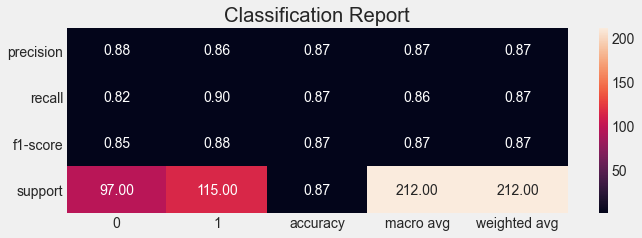

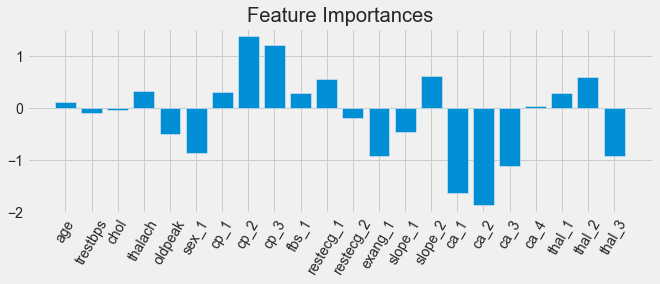

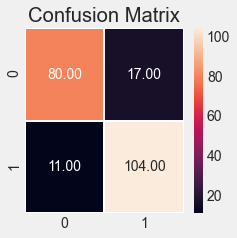

In [35]:
from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
print_scores(regr,X_train,y_train,X_test,y_test,True)